# Speed Performance for apex and tensorqtl

## Data Preparing

In [2]:
library("dplyr")
library("tibble")
library("readr")
library("modelr")
library("purrr")
library("tidyr")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [76]:
region = read_delim("/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wg_rds_list_final",delim = "\t")


── Column specification ────────────────────────────────────────────────────────
cols(
  `#region` = col_character(),
  chr = col_double(),
  start_position = col_double(),
  end_position = col_double()
)




In [77]:
region_output =  region%>%select(`#chr` = chr, start = start_position, end = end_position, gene_ID = `#region`)

In [78]:
region_output %>%write_delim("/mnt/mfs/statgen/neuro-apex/wg_rds_list_final",delim = "\t")

## GRM generations

In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/GRM.ipynb GRM \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/ \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --container "/mnt/mfs/statgen/containers/twas_latest.sif" \
  --job_size 1 \
  --Prefix "ROSMAP" \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/Apex_prototyping.ipynb apex_cis:1 \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/performance/ \
  --genotype_list /mnt/mfs/statgen/neuro-apex/ROSMAP-vcf/ROSMAP_vcf_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --iteration 2 \
  --container "/mnt/mfs/statgen/containers/apex.sif" \
  --job_size 1 \
  --grm_list /mnt/mfs/statgen/neuro-apex/GRM/ROSMAP.grm_list.txt \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml &



In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/Apex_TensorQTL.ipynb tensor_cis \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/performance/ \
  --genotype_list /mnt/mfs/statgen/neuro-apex/ROSMAP-vcf/ROSMAP_vcf_genotype_list.txt \
  --genotype_list_tensor /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --iteration 2 \
  --container "/mnt/mfs/statgen/containers/apex.sif" \
  --job_size 1 \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/Apex_TensorQTL.ipynb TensorQTL_output_processing \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/performance/ \
  --genotype_list /mnt/mfs/statgen/neuro-apex/ROSMAP-vcf/ROSMAP_vcf_genotype_list.txt \
  --genotype_list_tensor /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --iteration 2 \
  --container "/mnt/mfs/statgen/containers/apex.sif" \
  --job_size 1 \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/Apex_prototyping.ipynb output_processing \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/performance/ \
  --genotype_list /mnt/mfs/statgen/neuro-apex/ROSMAP-vcf/ROSMAP_vcf_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --iteration 2 \
  --container "/mnt/mfs/statgen/containers/apex.sif" \
  --job_size 1 \
  --grm_list /mnt/mfs/statgen/neuro-apex/GRM/ROSMAP.grm_list.txt \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

In [ ]:
nohup sos run ~/GIT/neuro-twas/workflow/uni_susie.ipynb susie_get_info   \
--molecular-pheno  /mnt/mfs/statgen/neuro-apex/performance/data/ROSMAP.mol_phe.resid.bed   \
--wd /mnt/mfs/statgen/neuro-apex/performance/susie/   \
--genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt  \
--region_list /mnt/mfs/statgen/neuro-apex/wg_rds_list_final   --region_name 1   \
--data_start 2   --window 1000000   --container /mnt/mfs/statgen/containers/twas_latest.sif  \
--job_size 1  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &


nohup sos run ~/GIT/neuro-twas/workflow/uni_susie.ipynb susie_get_info   \
--molecular-pheno  /mnt/mfs/statgen/neuro-apex/performance/data/ROSMAP.mol_phe.resid.bed   \
--wd /mnt/mfs/statgen/neuro-apex/performance/susie/   \
--genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt  \
--region_list /mnt/mfs/statgen/neuro-apex/demo_with_mwe/mwe/mwe_region   --region_name 1   \
--data_start 2   --window 1000000   --container /mnt/mfs/statgen/containers/twas_latest.sif  \
--job_size 1  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &




/mnt/mfs/statgen/neuro-apex/demo_with_mwe/mwe

## Time elasped for tensorQTL

In [79]:
tensor_time = read_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL_cache/time_tensorqtl",delim = " ",col_names = F)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_character()
)




In [80]:
tensor_time_elapsed = tensor_time%>%group_by(X1)%>%
summarise(tensor_cis_time = sum(X4))%>%
mutate(unit = "Min", chr  = map_dbl(X1,~read.table(text = .x , sep = ".")$V3))%>%
inner_join(region_output%>%count(`#chr`)%>%select(chr = `#chr`,n))%>%arrange(X1)

Joining, by = "chr"



In [81]:
tensor_time_elapsed

X1,tensor_cis_time,unit,chr,n
<chr>,<dbl>,<chr>,<dbl>,<int>
ROSMAP.cis_qtl_pairs.1.parquet.stdout:,15.88,Min,1,1688
ROSMAP.cis_qtl_pairs.10.parquet.stdout:,7.42,Min,10,701
ROSMAP.cis_qtl_pairs.11.parquet.stdout:,8.55,Min,11,938
ROSMAP.cis_qtl_pairs.12.parquet.stdout:,16.67,Min,12,898
ROSMAP.cis_qtl_pairs.13.parquet.stdout:,5.59,Min,13,315
ROSMAP.cis_qtl_pairs.14.parquet.stdout:,4.02,Min,14,562
ROSMAP.cis_qtl_pairs.15.parquet.stdout:,5.95,Min,15,584
ROSMAP.cis_qtl_pairs.16.parquet.stdout:,8.08,Min,16,853
ROSMAP.cis_qtl_pairs.17.parquet.stdout:,12.87,Min,17,998


## Time elasped Tensorqlt

In [68]:
ts_start = read_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL/start_time",delim = " ",col_names = F)%>%select(start_time = X8,X9)
ts_stop = read_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL/stop_time",delim = " ",col_names = F)%>%select(end_time = X8,X9)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)




In [82]:
ts_time_elapses = cbind(ts_start,ts_stop)[,1:3]%>%mutate(time_elapes = end_time - start_time, ts_time_elapes = as.numeric(time_elapes)/60)%>%select(ts_time_elapes)

In [83]:
ts_time_elapses

ts_time_elapes
<dbl>
16
9
11
7
4
7
11
8
9


## Time elasped for CIS_LMMlmm_start

In [84]:
lmm_start = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cache/lmm_start_time",delim = " ",col_names = F)%>%select(start_time = X8,X9)
lmm_stop = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cache/lmm_end_time",delim = " ",col_names = F)%>%select(end_time = X8,X9)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)




In [85]:
lmm_time_elapses = cbind(lmm_start,lmm_stop)[,1:3]%>%mutate(time_elapes = end_time - start_time, lmm_time_elapes = as.numeric(time_elapes)/60)%>%select(lmm_time_elapes)

In [86]:
cis_start = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cis/start_time",delim = " ",col_names = F)%>%select(start_time = X8,X9)
cis_stop = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cis/end_time",delim = " ",col_names = F)%>%select(end_time = X8,X9)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)




In [87]:
ts_time_elapses

ts_time_elapes
<dbl>
16
9
11
7
4
7
11
8
9


In [88]:
cis_time_elapses = cbind(cis_start,cis_stop)[,1:3]%>%mutate(time_elapes = end_time - start_time, cis_time_elapes = as.numeric(time_elapes)/60)%>%select(cis_time_elapes)

In [90]:
apex_lmm_cis_time_elapses = lmm_time_elapses + cis_time_elapses 
apex_cis_time = cis_time_elapses

In [92]:
cis_running_time = cbind(tensor_time_elapsed,apex_cis_time,apex_lmm_cis_time_elapses,ts_time_elapses)

In [93]:
cis_running_time

X1,tensor_cis_time,unit,chr,n,cis_time_elapes,lmm_time_elapes,ts_time_elapes
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ROSMAP.cis_qtl_pairs.1.parquet.stdout:,15.88,Min,1,1688,6,17,16
ROSMAP.cis_qtl_pairs.10.parquet.stdout:,7.42,Min,10,701,4,11,9
ROSMAP.cis_qtl_pairs.11.parquet.stdout:,8.55,Min,11,938,5,16,11
ROSMAP.cis_qtl_pairs.12.parquet.stdout:,16.67,Min,12,898,5,17,7
ROSMAP.cis_qtl_pairs.13.parquet.stdout:,5.59,Min,13,315,3,8,4
ROSMAP.cis_qtl_pairs.14.parquet.stdout:,4.02,Min,14,562,3,7,7
ROSMAP.cis_qtl_pairs.15.parquet.stdout:,5.95,Min,15,584,3,10,11
ROSMAP.cis_qtl_pairs.16.parquet.stdout:,8.08,Min,16,853,4,15,8
ROSMAP.cis_qtl_pairs.17.parquet.stdout:,12.87,Min,17,998,4,9,9


In [94]:
cis_running_time

X1,tensor_cis_time,unit,chr,n,cis_time_elapes,lmm_time_elapes,ts_time_elapes
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ROSMAP.cis_qtl_pairs.1.parquet.stdout:,15.88,Min,1,1688,6,17,16
ROSMAP.cis_qtl_pairs.10.parquet.stdout:,7.42,Min,10,701,4,11,9
ROSMAP.cis_qtl_pairs.11.parquet.stdout:,8.55,Min,11,938,5,16,11
ROSMAP.cis_qtl_pairs.12.parquet.stdout:,16.67,Min,12,898,5,17,7
ROSMAP.cis_qtl_pairs.13.parquet.stdout:,5.59,Min,13,315,3,8,4
ROSMAP.cis_qtl_pairs.14.parquet.stdout:,4.02,Min,14,562,3,7,7
ROSMAP.cis_qtl_pairs.15.parquet.stdout:,5.95,Min,15,584,3,10,11
ROSMAP.cis_qtl_pairs.16.parquet.stdout:,8.08,Min,16,853,4,15,8
ROSMAP.cis_qtl_pairs.17.parquet.stdout:,12.87,Min,17,998,4,9,9


In [95]:
cis_running_time = cis_running_time%>%
select(chr,n,unit,tensor_time = ts_time_elapes,apex_cis_time = cis_time_elapes,apex_time = lmm_time_elapes )%>%
mutate(Prefix = "ROSMAP")%>%mutate(tensor_time = 60*tensor_time/n,apex_cis_time = 60*apex_cis_time/n, apex_time = 60*apex_time/n,unit = "sec")

In [103]:
cis_running_time = cis_running_time%>%mutate(apex_lmm_time = apex_time - apex_cis_time )%>%select(-Prefix)

In [104]:
cis_running_time

chr,n,unit,tensor_time,apex_cis_time,apex_time,apex_lmm_time
<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1688,sec,0.5687204,0.2132701,0.6042654,0.3909953
10,701,sec,0.7703281,0.3423680,0.9415121,0.5991441
11,938,sec,0.7036247,0.3198294,1.0234542,0.7036247
12,898,sec,0.4677060,0.3340757,1.1358575,0.8017817
13,315,sec,0.7619048,0.5714286,1.5238095,0.9523810
14,562,sec,0.7473310,0.3202847,0.7473310,0.4270463
15,584,sec,1.1301370,0.3082192,1.0273973,0.7191781
16,853,sec,0.5627198,0.2813599,1.0550996,0.7737397
17,998,sec,0.5410822,0.2404810,0.5410822,0.3006012


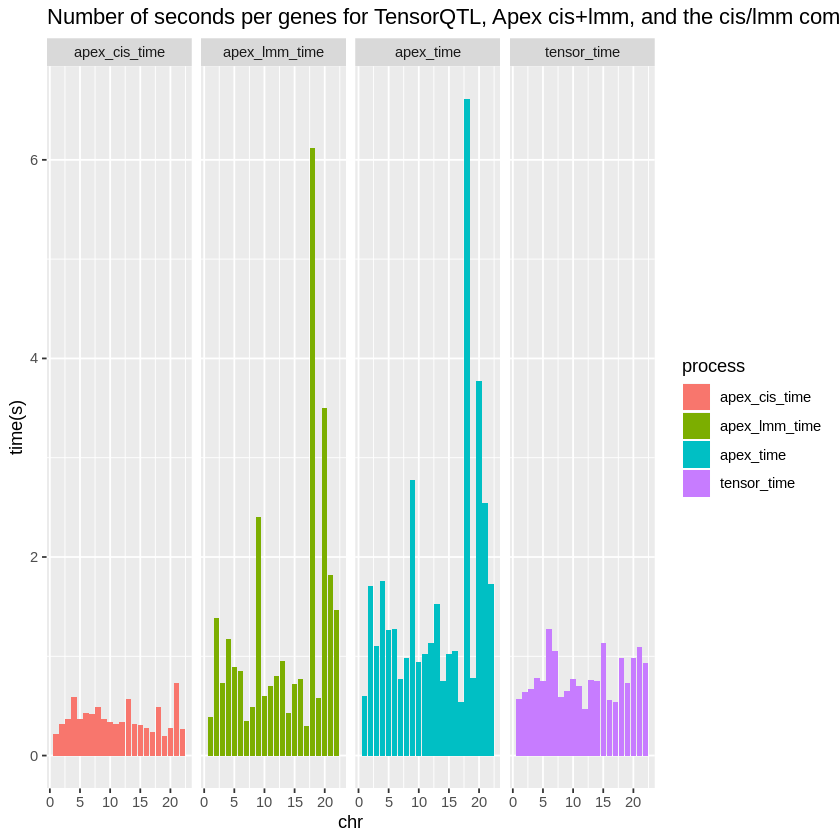

In [106]:
cis_running_time%>%pivot_longer(names_to = "process", values_to = "time(s)", col =tensor_time:apex_lmm_time )%>%
ggplot(aes(x = chr, y = `time(s)`, fill = process))+ geom_col()+facet_grid(~process)+ggtitle("Number of seconds per genes for TensorQTL, Apex cis+lmm, and the cis/lmm component of Apex")

## Result for one chromosome: 1

In [107]:
TensorQTL_result = tibble(chr = 1:22)

In [108]:
TensorQTL_result = TensorQTL_result%>%mutate(data_path = map_chr(chr,~paste(c("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL/ROSMAP.cis_qtl_pairs.",.x,".emprical.cis_sumstats.txt"),collapse = "")),
                                            tensor_data = map(data_path,~read_delim(.x,delim = "\t"))
                            )%>%unnest(tensor_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  gene_ID = col_character(),
  num_var = col_double(),
  beta_shape1 = col_double(),
  beta_shape2 = col_double(),
  true_df = col_double(),
  pval_true_df = col_double(),
  variant_id = col_character(),
  tss_distance = col_double(),
  ma_samples = col_double(),
  ma_count = col_double(),
  af = col_double(),
  pval_nominal = col_double(),
  slope = col_double(),
  slope_se = col_double(),
  pval_perm = col_double(),
  pval_beta = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  gene_ID = col_character(),
  num_var = col_double(),
  beta_shape1 = col_double(),
  beta_shape2 = col_double(),
  true_df = col_double(),
  pval_true_df = col_double(),
  variant_id = col_character(),
  tss_distance = col_double(),
  ma_samples = col_double(),
  ma_count = col_double(),
  af = col_double(),
  pval_nominal = col_double(),
  slope = col_double(),
  sl

In [109]:
ApexQTL_result = tibble(chr = 1:22)%>%mutate(data_path = map_chr(chr,~paste(c("/mnt/mfs/statgen/neuro-apex/performance/cis/ROSMAP.",.x,".cis_gene_table.txt.gz"),collapse = "")),
                                            apex_data = map(data_path,~read_delim(.x,delim = "\t"))
                            )%>%unnest(apex_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  `#chrom` = col_double(),
  start = col_double(),
  end = col_double(),
  gene = col_character(),
  egene_pval = col_double(),
  n_samples = col_double(),
  n_covar = col_double(),
  resid_sd = col_double(),
  n_cis_variants = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  `#chrom` = col_double(),
  start = col_double(),
  end = col_double(),
  gene = col_character(),
  egene_pval = col_double(),
  n_samples = col_double(),
  n_covar = col_double(),
  resid_sd = col_double(),
  n_cis_variants = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  `#chrom` = col_double(),
  start = col_double(),
  end = col_double(),
  gene = col_character(),
  egene_pval = col_double(),
  n_samples = col_double(),
  n_covar = col_double(),
  resid_sd = col_double(),
  n_cis_variants = col_double()
)





In [110]:
TensorQTL_result_sig = TensorQTL_result%>%select(chr,gene_ID,pval_beta)%>%mutate(Tensor_pval = p.adjust(pval_beta,method = "fdr"))%>%filter(Tensor_pval<0.05)

In [111]:
ApexQTL_result_sig = ApexQTL_result%>%select(chr,gene_ID = gene,egene_pval)%>%mutate(Apex_pval = p.adjust(egene_pval,method = "fdr"))%>%filter(Apex_pval<0.05)

## QQ Plot for pval

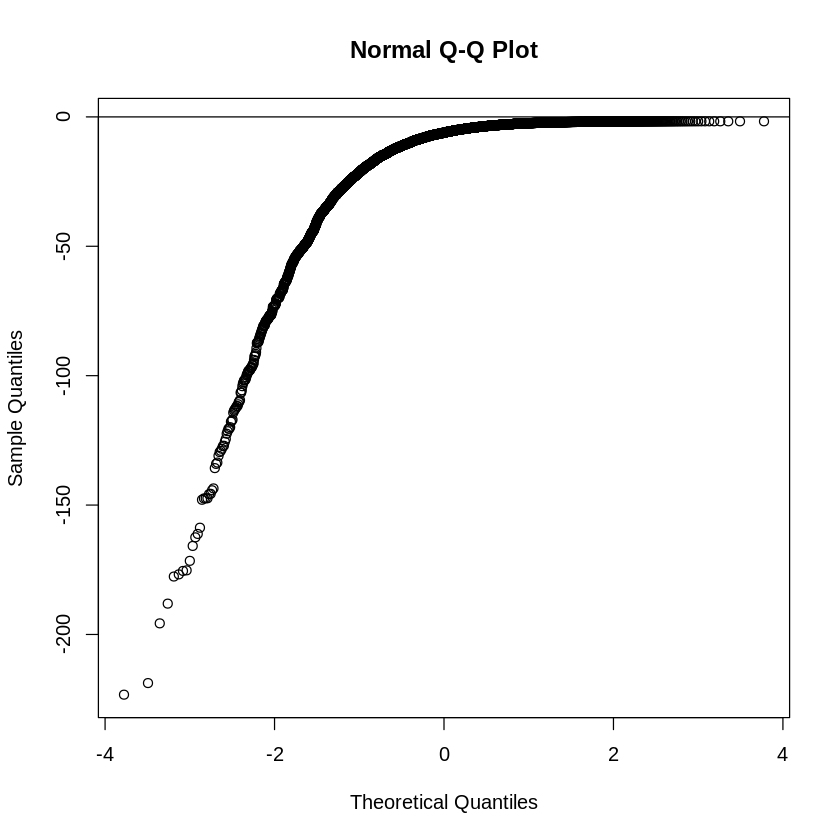

In [112]:
qqnorm(ApexQTL_result_sig$egene_pval%>%log10())
qqline(ApexQTL_result_sig$egene_pval)

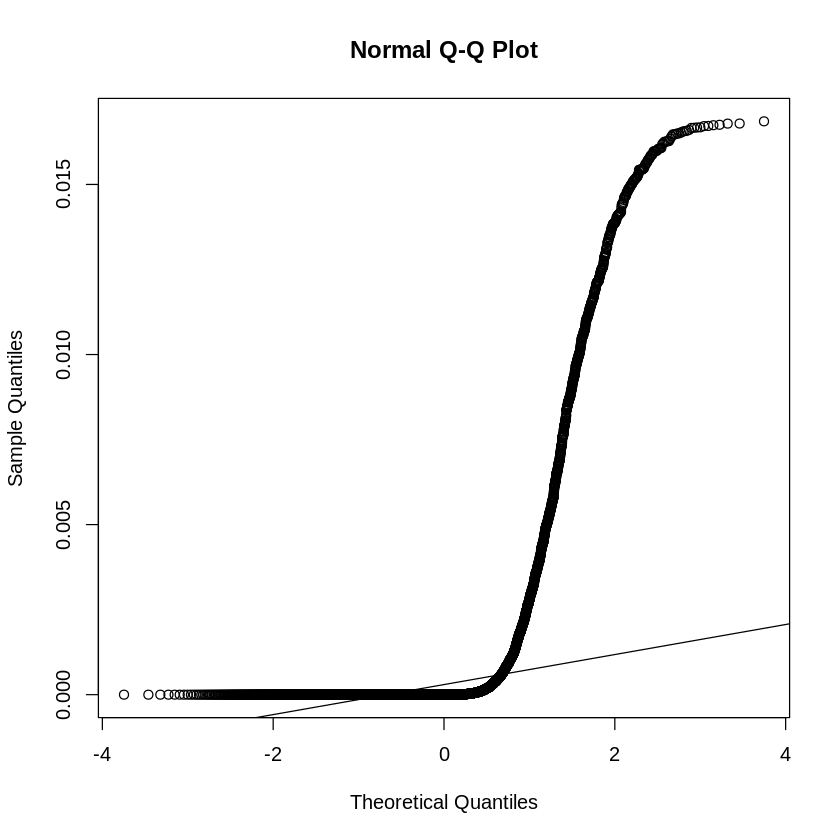

In [113]:
qqnorm(TensorQTL_result_sig$pval_beta)
qqline(TensorQTL_result_sig$pval_beta)

## Distribution of Pvalue

In [114]:
vis = inner_join(TensorQTL_result_sig,ApexQTL_result_sig)

Joining, by = c("chr", "gene_ID")



In [115]:
vis = vis%>%pivot_longer(names_to = "type",values_to = "pval",cols = egene_pval:Apex_pval )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



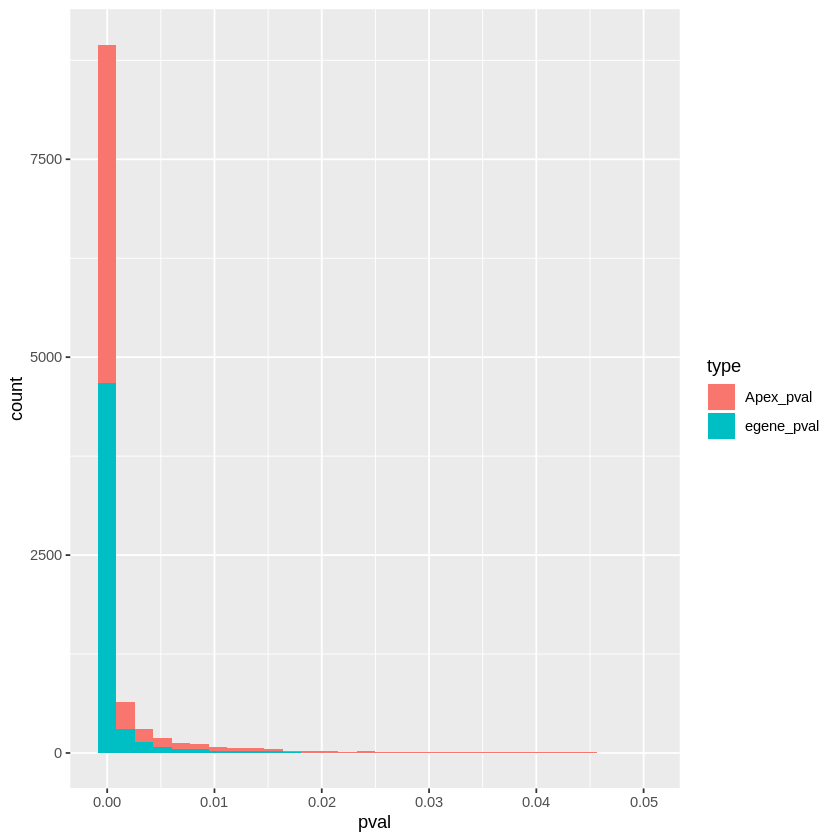

In [116]:
vis%>%ggplot(aes(x = pval,fill = type))+geom_histogram()

In [117]:
intersect(TensorQTL_result_sig$gene_ID,ApexQTL_result_sig$gene_ID)%>%length

[1] 5416

In [118]:
union(TensorQTL_result_sig$gene_ID,ApexQTL_result_sig$gene_ID)%>%length

[1] 6456

In [3]:
tensorQTL_result_1 = read_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL/ROSMAP.cis_qtl_pairs.22.norminal.cis_long_table.txt",delim = "\t")


── Column specification ────────────────────────────────────────────────────────
cols(
  gene_ID = col_character(),
  variant_id = col_character(),
  tss_distance = col_double(),
  af = col_double(),
  ma_samples = col_double(),
  ma_count = col_double(),
  pval_nominal = col_double(),
  slope = col_double(),
  slope_se = col_double()
)




In [1]:
tensorQTL_result_1%>%group_by(variant_id)%>%count()

ERROR: Error in tensorQTL_result_1 %>% group_by(variant_id) %>% count(): could not find function "%>%"


In [ ]:
# Import relevant sumstats
gwas.1 <- read_delim('/mnt/mfs/statgen/neuro-apex/performance/test/test_tensor.long_table.txt', delim='\t')
gwas.2 <- read_delim('/mnt/mfs/statgen/neuro-apex/performance/test/test_Apex.long_table.txt', delim='\t')

In [5]:
tensorQTL_result_1%>%count(variant_id)%>%arrange(-n)

variant_id,n
<chr>,<int>
22:38529500_G_T,57
22:38529876_C_CCAT,57
22:38530251_C_T,57
22:38530462_A_G,57
22:38530555_C_T,57
22:38530607_A_C,57
22:38530956_A_G,57
22:38531991_C_G,57
22:38532288_C_T,57


In [ ]:
tensorQTL_result_1%>%arrange(-af)%>%filter(!is.na(pval_nominal))%>%pull(variant_id)%>%unique()%>%length

In [149]:
tensorQTL_result_1%>%mutate(pval = p.adjust(pval_beta,method = "fdr") )%>%filter(!is.na(pval_nominal))%>%filter(pval < 0.05)

gene_ID,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,af,pval_nominal,slope,slope_se,pval_perm,pval_beta,pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000100181,3712,0.9755961,722.2007,568.4045,1.836792e-05,22:17087656_A_C,485768,414,520,0.60833335,4.106795e-06,0.38046557,0.081906400,0.01629837,1.479391e-02,3.439203e-02
ENSG00000283633,3712,0.9934548,946.7891,602.6243,4.022086e-12,22:17087656_A_C,485744,414,520,0.60833335,4.394049e-13,0.25248000,0.034152370,0.00009999,4.335157e-09,2.015624e-08
ENSG00000237438,5829,1.0205106,1526.2461,615.5758,1.184451e-58,22:17538082_A_C,501511,294,355,0.73268074,1.763683e-62,-0.47623740,0.025571778,0.00009999,1.350563e-56,3.582965e-55
ENSG00000273203,5919,0.9976257,1295.5015,592.2513,5.435984e-14,22:17522728_A_G,454906,139,151,0.11370482,2.341249e-15,-0.21838503,0.026901390,0.00009999,7.451710e-11,4.098440e-10
ENSG00000235478,6199,0.9854250,1141.7075,568.4062,4.099460e-33,22:17612604_C_T,491043,72,73,0.05496988,5.168236e-38,-0.64968120,0.047233842,0.00009999,1.260104e-29,2.104840e-28
ENSG00000093072,6441,1.0349118,1352.5741,590.0211,1.762604e-20,22:17683675_G_T,504884,383,463,0.65135545,1.260541e-22,0.16171095,0.015915401,0.00009999,6.171855e-18,5.680626e-17
ENSG00000099968,8225,1.0223255,1873.0048,614.1864,1.839337e-20,22:18212923_A_G,584067,219,239,0.17996988,8.875042e-22,-0.14767500,0.014858515,0.00009999,1.463838e-17,1.222576e-16
ENSG00000183785,8104,0.8616652,568.4453,465.2264,3.181515e-09,22:18589842_A_G,479510,374,453,0.65888554,1.942615e-12,0.09632277,0.013422620,0.00029997,1.186665e-05,3.993924e-05
ENSG00000280007,8104,0.7175466,347.0438,433.0476,2.219126e-08,22:18591993_A_G,481233,373,452,0.65963860,5.516035e-12,0.10485820,0.014935327,0.00069993,2.348073e-04,6.966979e-04


gene_ID,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,af,pval_nominal,slope,slope_se,pval_perm,pval_beta
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000100181,3712,0.9755961,722.2007,568.4045,1.836792e-05,22:17087656_A_C,485768,414,520,0.608333350,4.106795e-06,0.38046557,0.08190640,0.01629837,1.479391e-02
ENSG00000283633,3712,0.9934548,946.7891,602.6243,4.022086e-12,22:17087656_A_C,485744,414,520,0.608333350,4.394049e-13,0.25248000,0.03415237,0.00009999,4.335157e-09
ENSG00000237438,5829,1.0205106,1526.2461,615.5758,1.184451e-58,22:17538082_A_C,501511,294,355,0.732680740,1.763683e-62,-0.47623740,0.02557178,0.00009999,1.350563e-56
ENSG00000273203,5919,0.9976257,1295.5015,592.2513,5.435984e-14,22:17522728_A_G,454906,139,151,0.113704820,2.341249e-15,-0.21838503,0.02690139,0.00009999,7.451710e-11
ENSG00000177663,5975,0.8431253,220.1972,360.1562,1.738559e-04,22:17783505_C_T,698550,25,25,0.018825302,3.932257e-07,-0.32812878,0.06403447,0.07079292,6.650549e-02
ENSG00000183307,6168,0.7970605,285.2279,394.4441,1.841087e-04,22:17586715_A_ATCAC,470417,498,663,0.499246980,1.379886e-06,-0.05724238,0.01174707,0.09619038,1.002438e-01
ENSG00000235478,6199,0.9854250,1141.7075,568.4062,4.099460e-33,22:17612604_C_T,491043,72,73,0.054969880,5.168236e-38,-0.64968120,0.04723384,0.00009999,1.260104e-29
ENSG00000069998,6280,1.0174966,1502.2850,604.4309,2.738693e-04,22:17714695_A_G,577183,88,90,0.067771085,1.482955e-04,0.06513482,0.01706777,0.32986701,3.290561e-01
ENSG00000093072,6441,1.0349118,1352.5741,590.0211,1.762604e-20,22:17683675_G_T,504884,383,463,0.651355450,1.260541e-22,0.16171095,0.01591540,0.00009999,6.171855e-18


In [162]:
Apex_result = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cis/ROSMAP.22.cis_long_table.txt.gz",delim = "\t",col_names = T)


── Column specification ────────────────────────────────────────────────────────
cols(
  `#chrom` = col_double(),
  pos = col_double(),
  ref = col_character(),
  alt = col_character(),
  gene = col_character(),
  beta = col_double(),
  se = col_double(),
  pval = col_double()
)




In [ ]:
Apex_result%>%group_by(`#chrom`,pos,ref,alt)%>%summarise(n())

In [135]:
Apex_result%>%mutate(gene_pval = p.adjust(egene_pval,method = "fdr"))%>%filter(gene_pval < 0.05)

#chrom,start,end,gene,egene_pval,n_samples,n_covar,resid_sd,n_cis_variants,gene_pval
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,16601887,16601888,ENSG00000100181,2.23229e-03,664,6,0.99263800,3712,5.189499e-03
22,16601911,16601912,ENSG00000283633,9.63600e-10,664,6,0.80040700,3712,4.302808e-09
22,17036570,17036571,ENSG00000237438,6.63097e-59,664,6,0.98527300,5829,1.869105e-57
22,17067821,17067822,ENSG00000273203,7.90529e-11,664,6,0.61237300,5919,3.833641e-10
22,17084954,17084955,ENSG00000177663,7.08887e-03,664,6,0.57266300,5975,1.515204e-02
22,17116297,17116298,ENSG00000183307,1.51237e-03,664,6,0.55698200,6168,3.608883e-03
22,17121560,17121561,ENSG00000235478,9.93655e-32,664,6,0.59253800,6199,1.600494e-30
22,17178790,17178791,ENSG00000093072,8.11966e-19,664,6,0.78967100,6441,6.781420e-18
22,17628855,17628856,ENSG00000099968,7.88651e-17,664,6,0.60755600,8226,5.928027e-16


In [136]:
vis = rbind(Apex_result%>%mutate(gene_pval = p.adjust(egene_pval,method = "fdr"))%>%select(gene_pval)%>%mutate(Method = "Apex"),
tensorQTL_result_1%>%mutate(gene_pval = p.adjust(pval_perm,method = "fdr"))%>%select(gene_pval)%>%mutate(Method = "TensorQTL"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



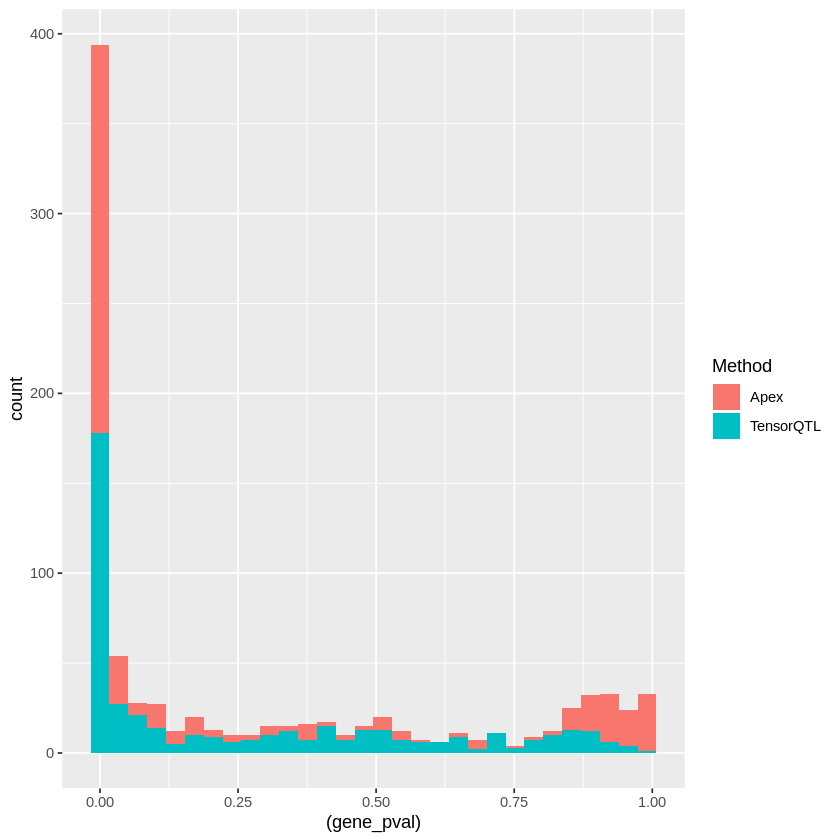

In [137]:
vis%>%filter(gene_pval < 1)%>%ggplot(aes(x = (gene_pval),fill = Method) )+geom_histogram()

In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/Apex_TensorQTL.ipynb Residual_Expression \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/performance/ \
  --genotype_list /mnt/mfs/statgen/neuro-apex/ROSMAP-vcf/ROSMAP_vcf_genotype_list.txt \
  --genotype_list_tensor /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --iteration 2 \
  --container "/mnt/mfs/statgen/containers/apex.sif" \
  --job_size 1 \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

In [45]:
susie_gene_cand = read_delim("/mnt/mfs/statgen/neuro-apex/wg_rds_list_final","\t" ) 


── Column specification ────────────────────────────────────────────────────────
cols(
  `#chr` = col_double(),
  start = col_double(),
  end = col_double(),
  gene_ID = col_character()
)




In [40]:
susie_gene_cand%>%filter(susie_gene_cand == 22)%>%write_delim("/mnt/mfs/statgen/neuro-apex/performance/data/rgs_22.txt",delim = "\t")

In [37]:
line_num = system("awk '($4==\"ENSG00000279933\") {print NR}' /mnt/mfs/statgen/neuro-apex/performance/data/ROSMAP.mol_phe.resid.bed", intern=T)



In [ ]:
nohup sos run ~/GIT/neuro-twas/workflow/uni_susie.ipynb condense  \
  --molecular-pheno  /mnt/mfs/statgen/neuro-apex/performance/data/ROSMAP.mol_phe.resid.bed   \
  --wd /mnt/mfs/statgen/neuro-apex/performance/susie/ \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /mnt/mfs/statgen/neuro-apex/wg_rds_list_final \
  --region_name 1 \
  --data_start 2 \
  --window 1000000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  -J 50 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &

In [140]:
susie = attach("/mnt/mfs/statgen/neuro-apex/performance/susie/susie_arch.RData")

In [141]:
b = susie$output%>%mutate(model = map(env,~.x$full_model),
               sets = map(model,~.x$sets),
               cs = map(sets,~.x$cs),
               n_cs = map_dbl(cs,~.x%>%length()),
               snps = map2(cs,model,~names(.y$X_column_scale_factors)[.x%>%unlist])
              )

In [142]:
susie_passed_gene = b%>%select(gene_ID,cs,n_cs)%>%filter(n_cs != 0)%>%pull(gene_ID)
tensor_qtl_passed_gene = tensorQTL_result_1%>%mutate(pval = p.adjust(pval_beta,method = "fdr"))%>%filter(pval < 0.05)%>%pull(gene_ID)
Apex_passed_gene = Apex_result%>%mutate(gene_pval = p.adjust(egene_pval,method = "fdr"))%>%filter(gene_pval < 0.05)%>%pull(gene)

In [8]:
nrow(b)

[1] 451

In [62]:
a = susie$output$env[[1]]

In [69]:
a$full_model$sets

$cs
NULL

$coverage
NULL

$requested_coverage
[1] 0.95

In [25]:
colnames(b)

[1] "gene_ID" "path"    "env"     "model"   "sets"    "cs"      "n_cs"   
[8] "snps"

In [85]:
b%>%select(gene_ID,snps,n_cs)%>%filter(n_cs > 0)%>%unnest(snps)%>%mutate(CHR = map_dbl(snps,~read.table(text = .x,sep = ":")[,1]),
                                                                         res = map_chr(snps,~read.table(text = .x,sep = ":",colClasses = "character")$V2),
                                                                         POS = map_dbl(res,~read.table(text = .x,sep = "_")$V1,as.is = T),
                                                                         REF = map_chr(snps,~read.table(text = .x,sep = "_",colClasses = "character")$V2),
                                                                         ALT = map_chr(snps,~read.table(text = .x,sep = "_",colClasses = "character")$V3)
                                                                        )%>%select(gene_ID,snps,CHR,POS,REF,ALT)%>%mutate(SNP = pmap(list(a = CHR,b = POS,c = REF, d = ALT),function(a,b,c,d) paste(c(a,":",b,"_",c,"_",d),collapse = ""))                                                                                                                         )

gene_ID,snps,CHR,POS,REF,ALT,SNP
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<list>
ENSG00000070371,22:19181319_C_G,22,19181319,C,G,22:19181319_C_G
ENSG00000070371,22:19181473_A_G,22,19181473,A,G,22:19181473_A_G
ENSG00000070371,22:19182874_C_T,22,19182874,C,T,22:19182874_C_T
ENSG00000070371,22:19183157_C_CT,22,19183157,C,CT,22:19183157_C_CT
ENSG00000070371,22:19183159_G_T,22,19183159,G,T,22:19183159_G_T
ENSG00000070371,22:19183787_A_G,22,19183787,A,G,22:19183787_A_G
ENSG00000070371,22:19185056_A_G,22,19185056,A,G,22:19185056_A_G
ENSG00000070371,22:19185606_C_T,22,19185606,C,T,22:19185606_C_T
ENSG00000070371,22:19187009_A_G,22,19187009,A,G,22:19187009_A_G


In [74]:
read.table(text = "22:19182874_C_T",sep = "_",as.is = T)

V1,V2,V3
<chr>,<chr>,<lgl>
22:19182874,C,TRUE


In [ ]:
nohup sos run ~/GIT/neuro-twas/workflow/uni_susie.ipynb condense    \
--molecular-pheno  /mnt/mfs/statgen/neuro-apex/performance/data/ROSMAP.mol_phe.resid.bed    \
--wd /mnt/mfs/statgen/neuro-apex/performance/susie/   \
--genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt  \
--region_list /mnt/mfs/statgen/neuro-apex/wg_rds_list_final   --region_name 1  \
--data_start 2   --window 1000000   --container /mnt/mfs/statgen/containers/twas_latest.sif  \
--job_size 1  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &


In [22]:
b = susie$output%>%mutate(model = map(env,~.x$full_model),
               sets = map(model,~.x$sets),
               cs = map(sets,~.x$cs),
               n_cs = map_dbl(cs,~.x%>%length()),
               snps = map2(cs,model,~names(.y$X_column_scale_factors)[.x%>%unlist])
              )

In [17]:
test = b$model[[1]]

In [18]:
test$X_column_scale_factors%>%names

[1] "22:49600869_C_T"                      
   [2] "22:49600883_C_T"                      
   [3] "22:49601128_A_G"                      
   [4] "22:49601285_A_G"                      
   [5] "22:49601593_A_G"                      
   [6] "22:49601602_G_T"                      
   [7] "22:49601611_A_ACGTGG"                 
   [8] "22:49601614_T_TGATAC"                 
   [9] "22:49602052_A_G"                      
  [10] "22:49602414_A_C"                      
  [11] "22:49603073_C_T"                      
  [12] "22:49603119_A_C"                      
  [13] "22:49603484_C_T"                      
  [14] "22:49603517_C_T"                      
  [15] "22:49603667_A_G"                      
  [16] "22:49603693_C_T"                      
  [17] "22:49603973_A_C"                      
  [18] "22:49604018_A_C"                      
  [19] "22:49604094_C_T"                      
  [20] "22:49604190_A_C"                      
  [21] "22:49605030_G_T"                      
  [22] "22:49605276_A_T"                      
  [23] "22:49605296_C_G"                      
  [24] "22:49605298_A_C"                      
  [25] "22:49605518_C_T"                      
  [26] "22:49605562_C_T"                      
  [27] "22:49605726_C_T"                      
  [28] "22:49606185_T_TTA"                    
  [29] "22:49606248_C_T"                      
  [30] "22:49606312_C_T"                      
  [31] "22:49606334_C_T"                      
  [32] "22:49607081_C_G"                      
  [33] "22:49607480_C_T"                      
  [34] "22:49608168_A_T"                      
  [35] "22:49608775_G_GT"                     
  [36] "22:49608873_C_G"                      
  [37] "22:49609121_A_G"                      
  [38] "22:49609546_C_T"                      
  [39] "22:49609686_A_G"                      
  [40] "22:49609689_A_C"                      
  [41] "22:49609820_C_T"                      
  [42] "22:49609900_C_T"                      
  [43] "22:49610157_A_G"                      
  [44] "22:49610259_C_T"                      
  [45] "22:49610444_A_G"                      
  [46] "22:49611062_A_G"                      
  [47] "22:49611103_G_T"                      
  [48] "22:49611272_C_T"                      
  [49] "22:49611552_G_T"                      
  [50] "22:49612346_G_GA"                     
  [51] "22:49612593_C_G"                      
  [52] "22:49612732_C_T"                      
  [53] "22:49612799_C_T"                      
  [54] "22:49612916_C_G"                      
  [55] "22:49613009_A_G"                      
  [56] "22:49613140_A_C"                      
  [57] "22:49613357_A_G"                      
  [58] "22:49613390_C_T"                      
  [59] "22:49613592_C_T"                      
  [60] "22:49613664_A_G"                      
  [61] "22:49613782_C_T"                      
  [62] "22:49613856_C_G"                      
  [63] "22:49613906_C_T"                      
  [64] "22:49614148_T_TA"                     
  [65] "22:49614330_A_G"                      
  [66] "22:49614349_A_G"                      
  [67] "22:49614983_C_T"                      
  [68] "22:49615418_A_G"                      
  [69] "22:49615607_C_T"                      
  [70] "22:49615673_C_T"                      
  [71] "22:49615674_A_G"                      
  [72] "22:49615762_A_T"                      
  [73] "22:49615911_A_G"                      
  [74] "22:49616360_G_T"                      
  [75] "22:49616438_C_T"                      
  [76] "22:49616449_C_G"                      
  [77] "22:49616535_A_G"                      
  [78] "22:49616543_C_G"                      
  [79] "22:49616566_A_C"                      
  [80] "22:49616743_C_T"                      
  [81] "22:49617004_A_T"                      
  [82] "22:49617107_C_T"                      
  [83] "22:49617128_A_G"                      
  [84] "22:49617362_A_G"                      
  [85] "22:49617514_A_T"                      
  [86] "

In [143]:
save = list(susie_passed_gene = susie_passed_gene,tensor_qtl_passed_gene = tensor_qtl_passed_gene, Apex_passed_gene = Apex_passed_gene)


In [144]:
save%>%saveRDS("~/tensorqtl_comparison")

ERROR: Error in library("RVenn"): there is no package called ‘RVenn’


## Number of variante analysis

In [38]:
a = read_delim("/mnt/mfs/statgen//neuro-apex//performance//tensorQTL/tensor_variants_analysis",delim = " ",col_names = F)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_double(),
  X4 = col_character()
)




In [59]:
a$X3%>%sum/2

[1] 9334355

In [53]:
b = read.table("/mnt/mfs/statgen//neuro-apex//performance/cis/total_cis_variants",sep = " ")

ERROR: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : line 2 did not have 23 elements


In [55]:
b = c(3221103,
2002711,
2006316,
1963220,
1447387,
1330840,
1193904,
1335842,
1175907,
1126310,
976562 ,
3485319,
914859 ,
548018 ,
568562 ,
2922855,
2851172,
2622423,
2563110,
2375439,
2270613,
1751968)

In [56]:
b%>%sum

[1] 40654440

In [164]:
data <- read_delim("/mnt/mfs/statgen/neuro-apex/performance/cis/ROSMAP.22.cis_long_table.txt.gz",delim = "\t")



ERROR: Error in guess_header_(datasource, tokenizer, locale): Cannot read file /tmp/1752790.1.csg.q/RtmpGHVxyw/file1a4a640f7453: Cannot allocate memory


In [165]:
data <- read_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL/ROSMAP.cis_qtl_pairs.20.norminal.cis_long_table.txt",delim = "\t")%>%select(-gene_ID,-tss_distance, -af,-ma_count,-slope,-slope_se)



ERROR: Error in guess_header_(datasource, tokenizer, locale): Cannot read file /mnt/mfs/statgen/neuro-apex/performance/tensorQTL/ROSMAP.cis_qtl_pairs.20.norminal.cis_long_table.txt: Cannot allocate memory


In [ ]:
data = data%>%as_tibble%>%mutate(SNP = pmap(list(a = `#chrom`,b = pos,c = ref, d = alt),function(a,b,c,d) paste(c(a,":",b,"_",c,"_",d),collapse = "")))
data = data%>%group_by(SNP)%>%top_n(-1, abs(pval))
data %>%write_delim("/mnt/mfs/statgen/neuro-apex/performance/ROSMAP.14.cis_long_table.txt.trimmed.txt",delim = "\t")

In [ ]:
data = data%>%group_by(variant_id)%>%top_n(-1, abs(pval_nominal))%>%mutate(CHR = map_dbl(variant_id,~read.table(text = .x,sep = ":")[,1]),
                                                                     res = map_chr(variant_id,~read.table(text = .x,sep = ":",colClasses = "character")$V2),
                                                                     POS = map_dbl(res,~read.table(text = .x,sep = "_")$V1,as.is = T),
                                                                     REF = map_chr(variant_id,~read.table(text = .x,sep = "_",colClasses = "character")$V2),
                                                                     ALT = map_chr(variant_id,~read.table(text = .x,sep = "_",colClasses = "character")$V3))

data %>%write_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL/ROSMAP.cis_qtl_pairs.20.norminal.cis_long_table.trimmed.txt",delim = "\t")



In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/hudson.ipynb hudson  \
    --cwd ./ \
    --sumstats_1 /mnt/mfs/statgen/neuro-apex/performance/tensorQTL/tensor.long_table.txt \
    --sumstats_2 /mnt/mfs/statgen/neuro-apex/performance/cis/Apex.long_table.txt \
    --toptitle TensorQTL \
    --bottomtitle Apex \
    --highlight_p_top 0 \
    --highlight_p_bottom 0 \
    --pval_filter 1 \
    --container_lmm /mnt/mfs/statgen/containers/lmm.sif \
     -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml &
    


In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/hudson.ipynb hudson      --cwd ./    \
--sumstats_1 /mnt/mfs/statgen/neuro-apex/performance/tensorQTL/tensor.long_table.txt    \
--sumstats_2 /mnt/mfs/statgen/neuro-apex/performance/cis/Apex.long_table.txt   \
--toptitle TensorQTL     --bottomtitle Apex     --highlight_p_top 0  \
--highlight_p_bottom 0  \
--highlight_snp /mnt/mfs/statgen/neuro-apex/performance/susie/ROSMAP.mol_phe.resid.extract_unique_snp.txt  \
--pval_filter 1     --snp1 variant_id     --pval1 pval_nominal   \
--container_lmm /mnt/mfs/statgen/containers/lmm.sif   \
-J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml &